### Imports

In [4]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Move two directories up to reach the parent directory of 'Projects'
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))

# Add the parent directory to the Python path
sys.path.append(parent_dir)

In [6]:
from datasets.traffic_signs_preprocessed.datasets_preparing import *
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import cv2

### Previewing Original Dataset

In [10]:
import os
print(os.getcwd())

/Users/sudharsangopalakrishnan/SmarTransit/Projects/Traffic Signal Classification


In [11]:
# Assume the current directory is 'Projects/P1'
# Move up two directories and then specify the path to the pickle file
with open("../../datasets/traffic_signs_preprocessed/data0.pickle", "rb") as f:
    data = pickle.load(f)

In [12]:
data.keys()

dict_keys(['x_test', 'y_validation', 'x_validation', 'labels', 'x_train', 'y_test', 'y_train'])

In [13]:
X_train = data["x_train"]
X_valid = data["x_validation"]
X_test = data["x_test"]

y_train = data["y_train"]
y_valid = data["y_validation"]
y_test = data["y_test"]

In [14]:
X_train.shape, X_valid.shape, X_test.shape

((86989, 3, 32, 32), (4410, 3, 32, 32), (12630, 3, 32, 32))

In [15]:
total_size = len(X_train) + len(X_valid) + len(X_test)
train_prp = len(X_train) / total_size
valid_prp = len(X_valid) / total_size
test_prp = len(X_test) / total_size
print("Data Summary")
print("------------")
print(f"Train: {train_prp*100:.2f}%\nValid: {valid_prp*100:.2f}%\nTest: {test_prp*100:.2f}%")

Data Summary
------------
Train: 83.62%
Valid: 4.24%
Test: 12.14%


In [17]:
label_list = label_text("../../datasets/traffic_signs_preprocessed/label_names.csv")

In [18]:
def plot_sample_image(X_train, y_train, label_list, index, alpha=1.5, beta=10):
    image = np.transpose(X_train[index], (1, 2, 0))

    # call convertScaleAbs function
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    sns.set_style("whitegrid")
    plt.imshow(adjusted)
    plt.title(f"Sign: {label_list[y_train[index]]}")
    plt.show()

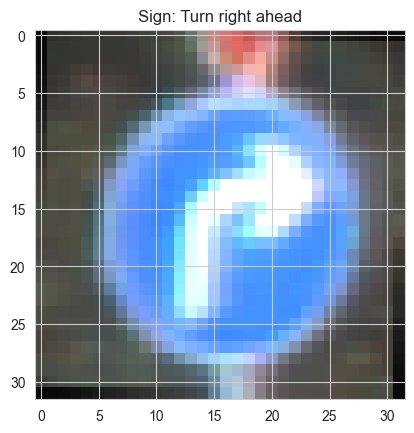

In [19]:
plot_sample_image(X_train, y_train, label_list, index=209, alpha=1.5, beta=10)

### Prepare Data

In [20]:
# Train, Valid, Test Files
train_file = "../../datasets/traffic_signs_preprocessed/train.pickle"
valid_file = "../../datasets/traffic_signs_preprocessed/valid.pickle"
test_file = "../../datasets/traffic_signs_preprocessed/test.pickle"

In [21]:
X_train, y_train, s_train, c_train = load_rgb_data(train_file)
X_valid, y_valid, s_valid, c_valid = load_rgb_data(valid_file)
X_test, y_test, s_test, c_test = load_rgb_data(test_file)

In [22]:
total_size = len(X_train) + len(X_valid) + len(X_test)
train_prp = len(X_train) / total_size
valid_prp = len(X_valid) / total_size
test_prp = len(X_test) / total_size
print("Data Summary")
print("------------")
print(f"Train: {train_prp*100:.2f}%\nValid: {valid_prp*100:.2f}%\nTest: {test_prp*100:.2f}%")

Data Summary
------------
Train: 67.13%
Valid: 8.51%
Test: 24.36%
